This analysis was performed on a Star Wars survey results data set published by FiveThirtyEight. Analysis was done to characterize Star Wars fans and determine which characters were well liked or viewed unfavorably.

In [1]:
cd data

[WinError 2] The system cannot find the file specified: 'data'
C:\Users\jennk\Desktop\data


In [2]:
cd star-wars-survey

C:\Users\jennk\Desktop\data\star-wars-survey


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read in data and explore dataframe

In [4]:
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

In [5]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [6]:
star_wars.columns
star_wars.shape

(1187, 38)

In [7]:
star_wars.dtypes

RespondentID                                                                                                                                     float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                      object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                             object
Which of the following Star Wars films have you seen? Please select all that apply.                                                               object
Unnamed: 4                                                                                                                                        object
Unnamed: 5                                                                                                                                        object
Unnamed: 6                                                                        

In [8]:
star_wars[star_wars.columns[15:29]].head(1)

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda


The survey asked respondents to rate each character in columns 15 through 28. However, the character name in question is located in the first row of the dataframe. We will rename our columns to identify the 'Unnamed' columns with the appropriate character so that we will have this data after cleaning out this first row from our dataframe in a later step.

In [9]:
star_wars = star_wars.rename(columns={
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her." : "Han Solo",
    "Unnamed: 16" : "Luke Skywalker",
    "Unnamed: 17" : "Princess Leia",
    "Unnamed: 18" : "Organa",
    "Unnamed: 19" : "Anakin Skywalker",
    "Unnamed: 20" : "Obi Wan Kenobi",
    "Unnamed: 21" : "Emperor Palpatine",
    "Unnamed: 22" : "Darth Vader",
    "Unnamed: 23" : "Lando Calrissian",
    "Unnamed: 24" : "Boba Fett",
    "Unnamed: 25" : "C-3P0",
    "Unnamed: 26" : "R2-D2",
    "Unnamed: 27" : "Jar Jar Binks",
    "Unnamed: 28" : "Padme Amidala",
    "Unnamed: 29" : "Yoda"  
})
star_wars[star_wars.columns[15:29]].head()

,Han Solo,Luke Skywalker,Princess Leia,Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2-D2,Jar Jar Binks,Padme Amidala
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably


In [10]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [11]:
star_wars.shape

(1186, 38)

# Clean up dataframe and recode survey results

In [12]:
yes_no = {
    "Yes": True,
    "No" : False
}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

In [13]:
yes_no = {
    "Yes": True,
    "No" : False
}
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [14]:
movie_mapping = {
    np.NaN: False,
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(movie_mapping)

In [15]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})
star_wars.columns[3:9]
star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


# Exploring Star Wars movie ranking results

In [16]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [17]:
star_wars[star_wars.columns[9:15]].head()


,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [18]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [19]:
avg_movie_ranking = star_wars[star_wars.columns[9:15]].mean()

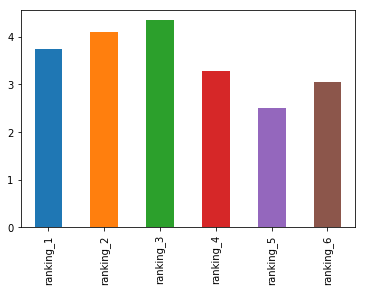

In [20]:
avg_movie_ranking.plot.bar()

I converted all the rankings for each movie to floats to be able to calculate the average score given to each movie. From this data, it looks like the third film, Episode III Revenge of the Sith, is the most lowest rated movie across respondents. It also looks like the first three movies are generally rated lower than the last three films. These first three episodes were made after the first trilogy and have better visual effects but did not live up to the expectation of the first triology. The last three episodes are the first trilogy and have poorer visual effects but more of a cult following. It looks like the fifth movie, The Empire Strikes Back is the highest rated movie of the Star Wars franchise.

# Exploring how many respondents watched each movie

In [21]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

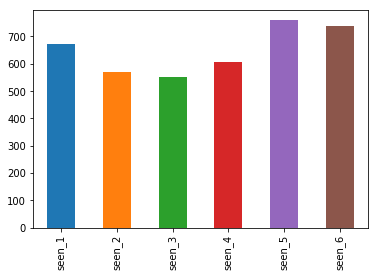

In [22]:
sum_seen = star_wars[star_wars.columns[3:9]].sum()
sum_seen.plot.bar()

It looks like more people have seen the original trilogy (Episodes 4-6) than the second trilogy (Episodes 1-3). From online research, it seems like more people appreciate the original story and graphics of the original trilogy and there seems to be more of a cult following for those three movies than the second trilogy.

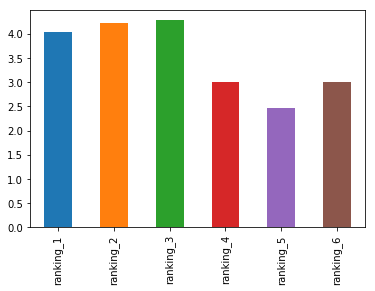

In [23]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

males[males.columns[9:15]].mean().plot.bar()

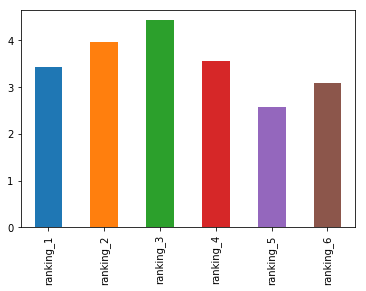

In [24]:
females[females.columns[9:15]].mean().plot.bar()

There is a similar trend in movie ranking between males and females. However, it seems like Episode 1 is rated a little better than Episode 4 by females.

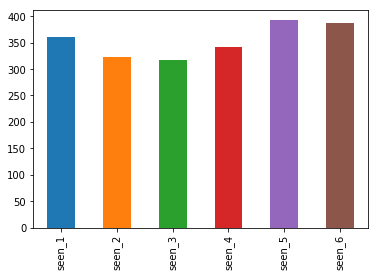

In [25]:
males[males.columns[3:9]].sum().plot.bar()

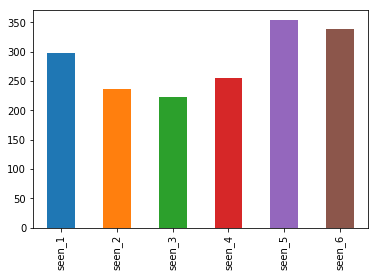

In [26]:
females[females.columns[3:9]].sum().plot.bar()

More female viewers watched Episode 1 than Episode 4. This correlates to the better ratings for Episode 1 than Episode 4 by the female population.

# Exploring how education levels correlate with survey results

In [27]:
star_wars["Education"].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

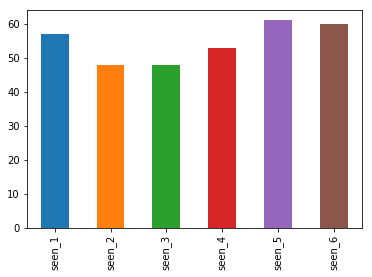

In [28]:
hs_pop = star_wars[star_wars["Education"] == "Less than high school degree"]
hs_pop = star_wars[star_wars["Education"] == "High school degree"]
some_college = star_wars[star_wars["Education"] == "Some college or Associate degree"]
bachelor = star_wars[star_wars["Education"] == "Bachelor degree"]
graduate = star_wars[star_wars["Education"] == "Graduate degree"]

hs_pop[hs_pop.columns[3:9]].sum().plot.bar()

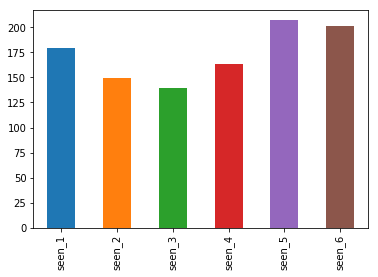

In [29]:
graduate[graduate.columns[3:9]].sum().plot.bar()

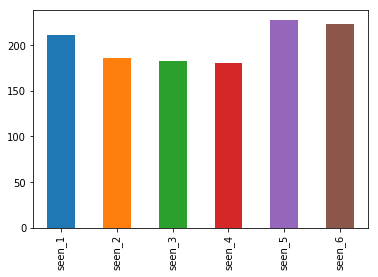

In [30]:
some_college[some_college.columns[3:9]].sum().plot.bar()

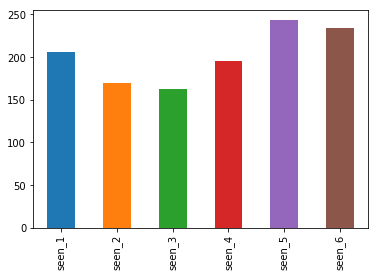

In [31]:
bachelor[bachelor.columns[3:9]].sum().plot.bar()

For the younger generation of respondents (high school, less than high school degree), there is less of a difference between the most and least viewed movie.

# Exploring favorability of Star Wars characters

In [32]:
star_wars["Han Solo"].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

In [33]:
star_wars["Han Solo"].value_counts().sum()

829

In [34]:
star_wars[star_wars.columns[15:29]].head()

,Han Solo,Luke Skywalker,Princess Leia,Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2-D2,Jar Jar Binks,Padme Amidala
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [35]:
star_wars["Emperor Palpatine"].value_counts()

Very favorably                                 310
Somewhat favorably                             171
Very unfavorably                               149
Somewhat unfavorably                           102
Neither favorably nor unfavorably (neutral)     84
Unfamiliar (N/A)                                10
Name: Emperor Palpatine, dtype: int64

In [36]:
favorability_mapping = {
    "Very favorably": "Favorable",
    "Somewhat favorably": "Favorable",
    "Neither favorably nor unfavorably (neutral)": "Neutral",
    "Unfamiliar (N/A)": "Unfamiliar",
    "Somewhat unfavorably": "Unfavorable",
    "Very unfavorably": "Unfavorable",
    np.NaN: np.NaN
}

for col in star_wars.columns[15:29]:
    star_wars[col]=star_wars[col].map(favorability_mapping)
    
star_wars[star_wars.columns[15:29]].head()

,Han Solo,Luke Skywalker,Princess Leia,Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2-D2,Jar Jar Binks,Padme Amidala
1,Favorable,Favorable,Favorable,Favorable,Favorable,Favorable,Favorable,Unfamiliar,Unfamiliar,Favorable,Favorable,Favorable,Favorable,Favorable
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Favorable,Favorable,Favorable,Favorable,Favorable,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar
4,Favorable,Favorable,Favorable,Favorable,Favorable,Favorable,Favorable,Favorable,Unfavorable,Favorable,Favorable,Favorable,Favorable,Favorable
5,Favorable,Favorable,Favorable,Unfavorable,Favorable,Unfavorable,Favorable,Neutral,Favorable,Favorable,Favorable,Unfavorable,Favorable,Favorable


In [37]:
Han_Solo_ratings = star_wars["Han Solo"].value_counts()

In [38]:
rating_index = Han_Solo_ratings.index

In [39]:
rating_index

Index(['Favorable', 'Neutral', 'Unfamiliar', 'Unfavorable'], dtype='object')

In [40]:
value_counts = {}
for f in rating_index:
    f_only = star_wars[star_wars['Han Solo'] == f]
    f_model = f_only["Han Solo"].value_counts()
    value_counts[f] = float(f_model)

In [41]:
value_counts

{'Favorable': 761.0, 'Neutral': 44.0, 'Unfamiliar': 15.0, 'Unfavorable': 9.0}

In [42]:
Han_series = pd.Series(value_counts)
df = pd.DataFrame(Han_series, columns=['Han_ratings'])
df['Han_rating_pct']= df['Han_ratings']/df['Han_ratings'].sum()*100
df

,Han_ratings,Han_rating_pct
Favorable,761.0,91.797346
Neutral,44.0,5.307600
Unfamiliar,15.0,1.809409
Unfavorable,9.0,1.085645


In [43]:
Luke_counts = {}
for f in rating_index:
    f_only = star_wars[star_wars['Luke Skywalker'] == f]
    f_model = f_only['Luke Skywalker'].value_counts()
    Luke_counts[f] = float(f_model)
Luke_series = pd.Series(Luke_counts)
df['Luke_ratings']= Luke_series
df['Luke_rating_pct']= df['Luke_ratings']/df['Luke_ratings'].sum()*100
df

,Han_ratings,Han_rating_pct,Luke_ratings,Luke_rating_pct
Favorable,761.0,91.797346,771.0,92.779783
Neutral,44.0,5.307600,38.0,4.572804
Unfamiliar,15.0,1.809409,6.0,0.722022
Unfavorable,9.0,1.085645,16.0,1.925391


In [44]:
JarJar_counts = {}
for f in rating_index:
    f_only = star_wars[star_wars['Jar Jar Binks'] == f]
    f_model = f_only['Jar Jar Binks'].value_counts()
    JarJar_counts[f] = float(f_model)
JarJar_series = pd.Series(JarJar_counts)
df['JarJar_ratings']= JarJar_series
df['JarJar_rating_pct']= df['JarJar_ratings']/df['JarJar_ratings'].sum()*100
df

,Han_ratings,Han_rating_pct,Luke_ratings,Luke_rating_pct,JarJar_ratings,JarJar_rating_pct
Favorable,761.0,91.797346,771.0,92.779783,351.0,43.120393
Neutral,44.0,5.307600,38.0,4.572804,207.0,25.429975
Unfamiliar,15.0,1.809409,6.0,0.722022,164.0,20.147420
Unfavorable,9.0,1.085645,16.0,1.925391,92.0,11.302211


In [45]:
Emperor_counts = {}
for f in rating_index:
    f_only = star_wars[star_wars['Emperor Palpatine'] == f]
    f_model = f_only['Emperor Palpatine'].value_counts()
    Emperor_counts[f] = float(f_model)
Emperor_series = pd.Series(Emperor_counts)
df['EmperorPalpatine_ratings']= Emperor_series
df['EmperorPalpatine_rating_pct']= df['EmperorPalpatine_ratings']/df['EmperorPalpatine_ratings'].sum()*100
df

,Han_ratings,Han_rating_pct,Luke_ratings,Luke_rating_pct,JarJar_ratings,JarJar_rating_pct,EmperorPalpatine_ratings,EmperorPalpatine_rating_pct
Favorable,761.0,91.797346,771.0,92.779783,351.0,43.120393,481.0,58.232446
Neutral,44.0,5.307600,38.0,4.572804,207.0,25.429975,84.0,10.169492
Unfamiliar,15.0,1.809409,6.0,0.722022,164.0,20.147420,10.0,1.210654
Unfavorable,9.0,1.085645,16.0,1.925391,92.0,11.302211,251.0,30.387409


In [46]:
cols = ['Han_rating_pct', 'Luke_rating_pct', 'JarJar_rating_pct', 'EmperorPalpatine_rating_pct']
new_df = df[cols]
new_df

,Han_rating_pct,Luke_rating_pct,JarJar_rating_pct,EmperorPalpatine_rating_pct
Favorable,91.797346,92.779783,43.120393,58.232446
Neutral,5.307600,4.572804,25.429975,10.169492
Unfamiliar,1.809409,0.722022,20.147420,1.210654
Unfavorable,1.085645,1.925391,11.302211,30.387409


In [47]:
x = new_df.iloc[0]
x

Han_rating_pct                 91.797346
Luke_rating_pct                92.779783
JarJar_rating_pct              43.120393
EmperorPalpatine_rating_pct    58.232446
Name: Favorable, dtype: float64

In [48]:
y = new_df.columns[0:4]
y

Index(['Han_rating_pct', 'Luke_rating_pct', 'JarJar_rating_pct',
       'EmperorPalpatine_rating_pct'],
      dtype='object')

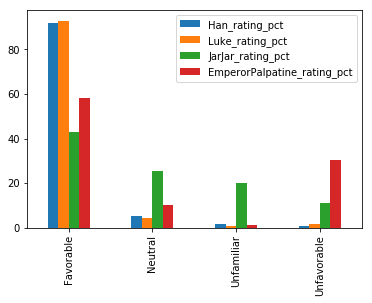

In [50]:
new_df.plot.bar()

Luke Skywalker and Han Solo have high favorability ratings from over 90% of respondents. Surprisingly, a higher percentage of respondents to the survey viewed Emperor Palpatine more favorably than Jar Jar Binks. However, about 50% of the respondents viewed Jar Jar Binks as a neutral character or were unfamiliar. Emperor Palpatine has the highest ratings of unfavorability.